------endnetwork-------
[array([[-0.30407383,  1.07750708,  0.47017752,  0.38104971,  2.01193545,
         1.15012415,  0.09080932,  0.27001475],
       [ 1.32341039, -0.94798134,  0.8434695 ,  1.25996053, -0.50023736,
         0.54675502, -0.04163871, -0.8095378 ],
       [ 1.12095973,  0.29303837, -1.02914836, -0.25216054, -0.06569451,
        -1.0840686 , -0.01126142,  1.72986029]]),
 array([[-0.26626352, -0.02469604,  0.05662918, -0.21377262,  0.48685838,
        -0.15185621, -0.1607172 ,  0.06473111]]),
 array([[ 0.45022825, -0.10725514,  1.21293997,  1.03494356,  1.32625974,
         0.10478981,  0.2073124 ,  0.67582778],
       [ 0.21809133,  0.98120583, -0.39912015,  0.00318632,  1.21846582,
        -0.0882067 ,  0.89935354,  0.33543594],
       [-0.47814989,  1.25302624, -0.07883986,  0.91066648, -0.09502747,
         1.15536396, -0.12516286,  0.38454334],
       [ 0.16875361,  0.68261138,  0.90126899,  1.45045616,  0.19276164,
         0.78153409, -0.07019631,  0.12377995],
 

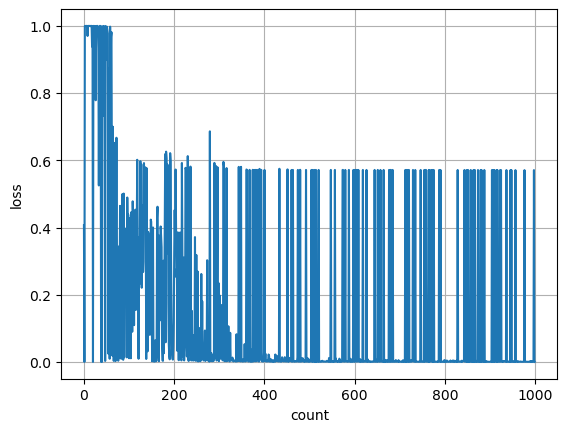

In [6]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

def forward(network, in_x):
    W1, W2, W3 = network[0], network[2], network[4] #　　　名前か番号か迷う
    b1, b2, b3 = network[1], network[3], network[5]

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),\
                      int(teach==1),\
                      int(teach==2),\
                      int(teach==3),\
                      int(teach==4),\
                      int(teach==5),\
                      int(teach==6),\
                      int(teach==7)])
    return in_x, teach




#初期の重みとバイアスを記入
Nin = 3
M1 = 8
M2 = 8
Nout = 8
tau = 1.0
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([Nin,M1])*tau
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,M1])*tau
#8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([M1,M2])*tau
#5つのニューロンにたすバイアス
b2 = np.random.random([1,M2])*tau
#5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([M2,Nout])*tau
#バイアスを8つのニューロンにたす
b3 = np.random.random([1,Nout])*tau

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = .8
#学習回数を定義
learn = 1000


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
#koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得
                Network1 = Network.copy()
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する
                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する
                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)
    COUNT.append(i)
    LOSS.append(loss)

    # print("success")

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()

    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する

